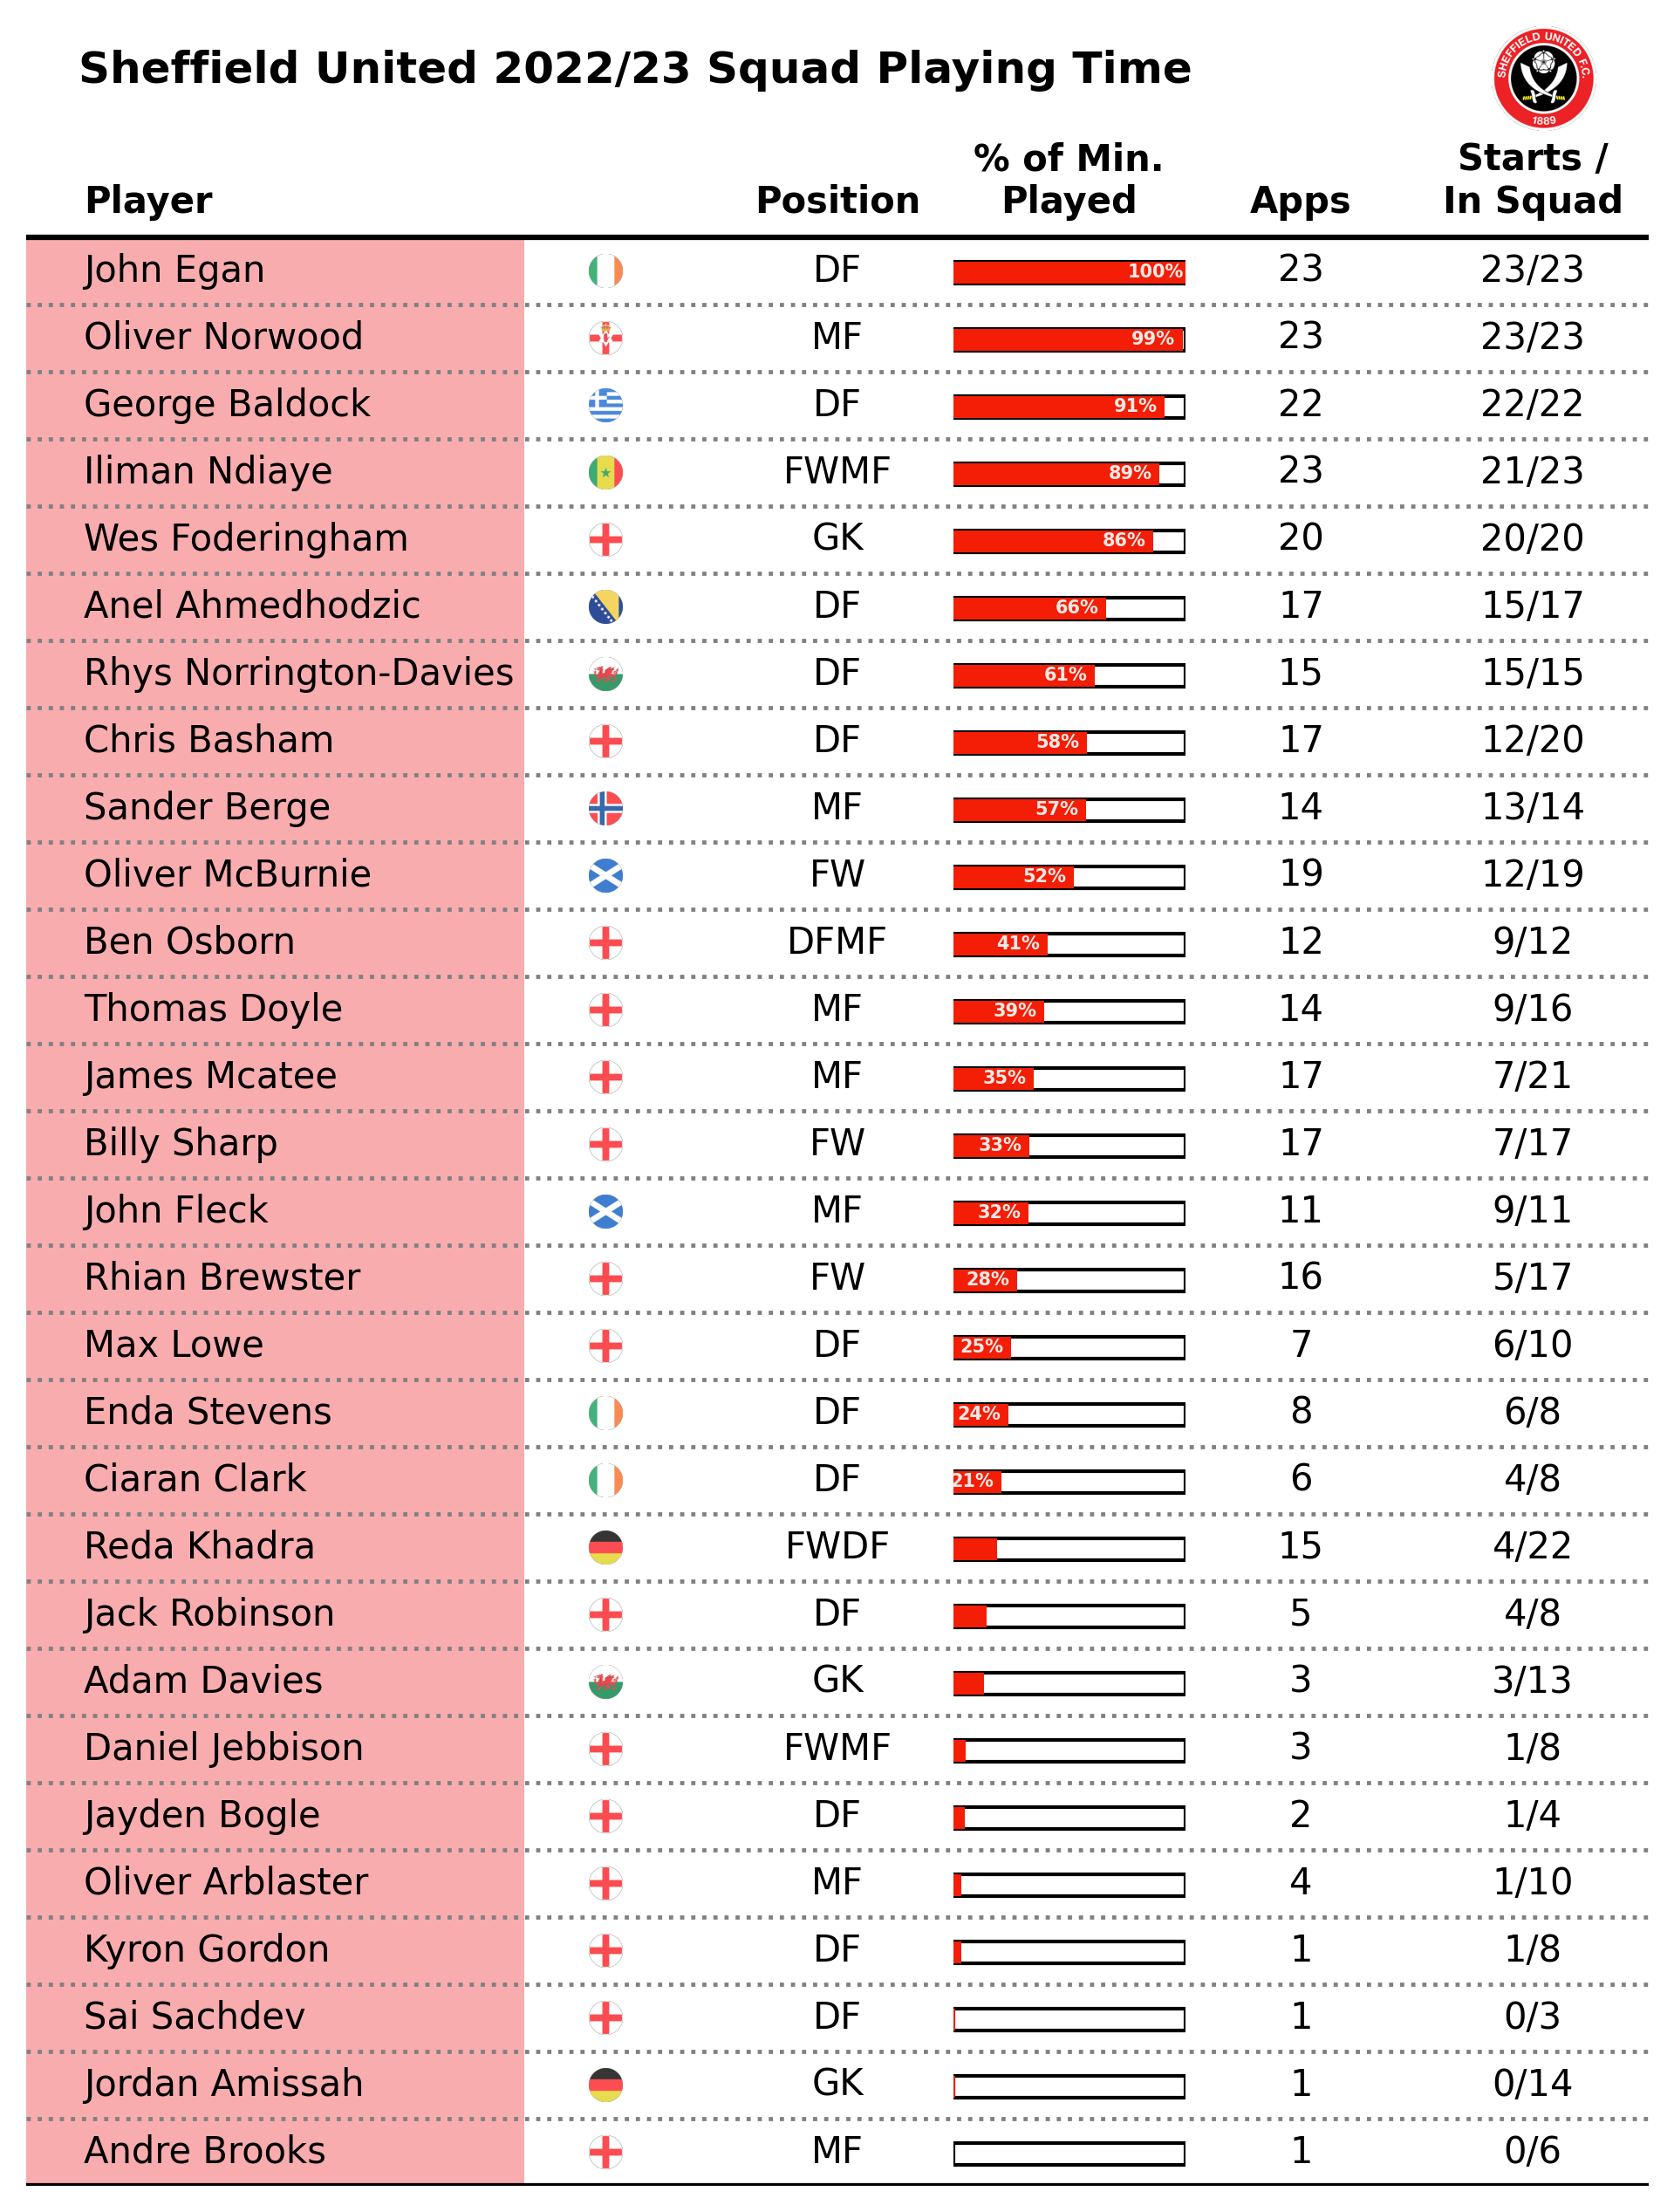

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import urllib
import os

gp = 23

df = pd.read_csv('D:/Python/CSVs/SUFCPT3.csv', header=[1])

df_final = df[df['Min'] >= 0].reset_index(drop=True)
df_final = df_final[['Player', 'Nation', 'Pos', 'Min', 'MP', 'Starts', 'Subs', 'unSub']]
df_final['InSquad'] = df_final['MP'] + df_final['unSub']
df_final = df_final.sort_values(by='Min').reset_index(drop=True)
df_final = df_final[~df_final['Pos'].isna()]
df_final['Nation'] = [x.split(' ')[1].lower() for x in df_final['Nation']]
df_final['Starts_InSquad'] = [f'{x}/{y}' for x,y in zip(df_final['Starts'], df_final['InSquad'])]
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

def minutes_battery(minutes, ax):
    '''
    This function takes an integer and an axes and 
    plots a battery chart.
    '''
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.barh([0.5], [1], fc = 'white', ec='black', height=.35)
    ax.barh([0.5], [minutes/(90*gp)], fc = '#F31e05', height=.35)
    if minutes/(90*gp) > 0.2:
        text_ = ax.annotate(
            xy=(minutes/(90*gp), .5),
            text=f'{minutes/(90*gp):.0%}',
            xytext=(-8,0),
            textcoords='offset points',
            weight='bold',
            color='#EFE9E6',
            va='center',
            ha='center',
            size=5
        )
    ax.set_axis_off()
    return ax

fig = plt.figure(figsize=(8,10), dpi=300)
ax = plt.subplot()

ncols = 6
nrows = df_final.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3.5, 4.5, 5.5, 6.5]
columns = ['Player', 'Pos', 'Min', 'MP', 'Starts_InSquad']

# -- Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            continue
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['Nation'].iloc[x], flag_ax)

ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([5, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([4, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    minutes_battery(df_final['Min'].iloc[x], bar_ax)

# -- Add column names
column_names = ['Player', 'Position', '% of Min.\nPlayed', 'Apps', 'Starts /\nIn Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.fill_between(
    x=[0,2.15],
    y1=nrows,
    y2=0,
    color='#f25a5f',
    alpha=0.5,
    ec='None'
)

ax.set_axis_off()
# -- Final details
logo_ax = fig.add_axes(
    [0.825, 0.89, .05, .05]
)
ax_logo(8657, logo_ax)
fig.text(
    x=0.15, y=.91,
    s='Sheffield United 2022/23 Squad Playing Time',
    ha='left',
    va='bottom',
    weight='bold',
    size=12
)
plt.savefig(
    'D:/Python/Graphics/final_table.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)
plt.savefig(
    'D:/Python/Graphics/final_table_bkg.png',
    dpi=300,
    transparent=False,
    facecolor='#EFE9E6',
    bbox_inches='tight'
)